This notebook takes a look at the results from a hypothetical slot machine through the lenses of the normal and binomial distributions
* Tutor: Anthropic's AI Claude

Why the binomal distribution is favored:

Your current data [0, 0, 1.5, 0, 1.5] shows:
1. **Discrete outcomes** - you only see two values: 0 and 1.5
   - 3 times you got 0
   - 2 times you got 1.5
   - There are no values in between

This pattern suggests:
- A discrete probability distribution (like binomial) might be more appropriate than a continuous one (like normal)
- It's similar to a "success/failure" pattern where:
  - "Success" = getting 1.5 (happened 2/5 times)
  - "Failure" = getting 0 (happened 3/5 times)

The binomial distribution would be particularly suitable because:
- It models events with exactly two possible outcomes
- The outcomes are independent (each spin doesn't affect the next)
- There's a fixed probability of success on each trial




Glossary:
--------------------------------------------------------------------------------
Normal Distribution       | A continuous probability distribution that follows a bell-shaped curve
Binomial Distribution     | A discrete probability distribution that models the number of successes in fixed trials
Mean                      | The average value of a dataset, sum of values divided by count
Median                    | The middle value when data is ordered
Standard Deviation        | A measure of variability, showing spread from the mean
Probability Density       | Height of probability distribution curve at any given point
Probability Mass          | Probability of discrete outcome in binomial distribution
n                         | Number of trials in binomial distribution
k                         | Number of successes in binomial distribution
p                         | Probability of success in single trial
μ (mu)                    | Population mean parameter in normal distri

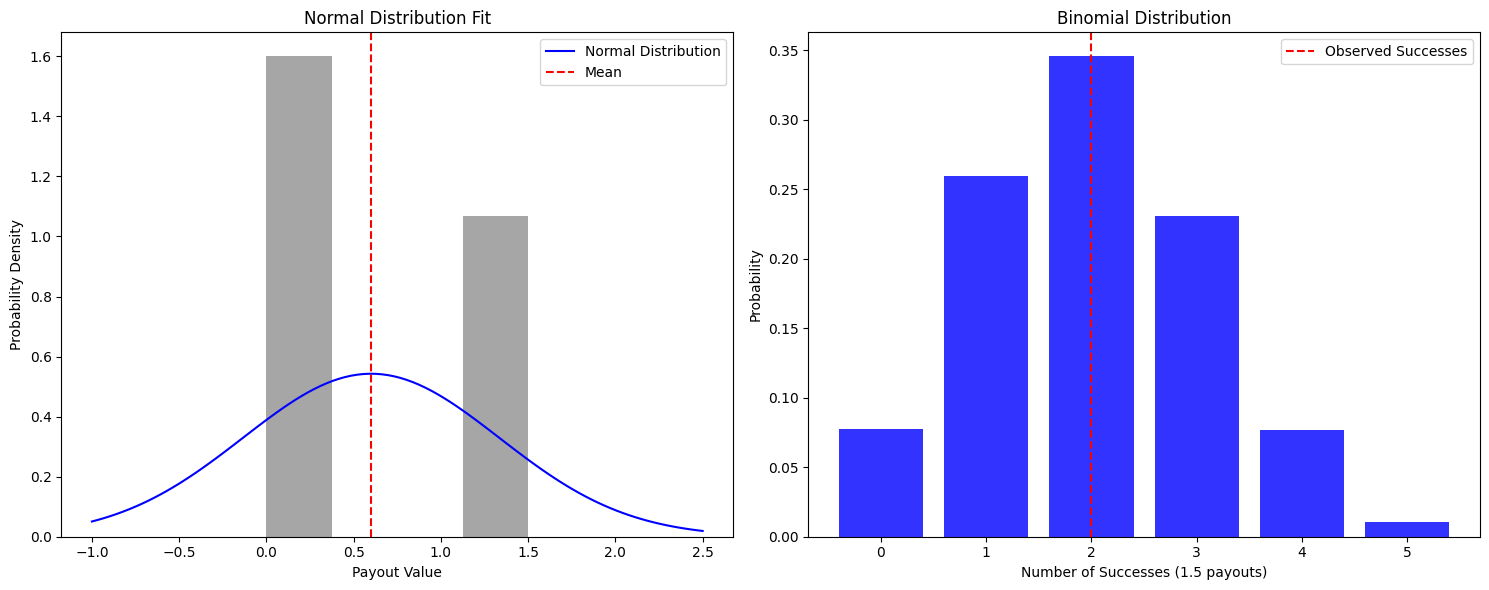

In [2]:
"""
Abstract:
This script analyzes slot machine payout data using both normal and binomial distributions.
It demonstrates the difference between continuous and discrete probability distributions
using a small sample dataset [0, 0, 1.5, 0, 1.5]. The script includes statistical calculations,
probability distributions, and visualizations to help understand the underlying patterns in the data.

Author: Claude
Date: December 2024
"""

# Required package installations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

# Define the glossary as a dictionary
GLOSSARY = {
    'Normal Distribution': 'A continuous probability distribution that follows a bell-shaped curve',
    'Binomial Distribution': 'A discrete probability distribution that models the number of successes in fixed trials',
    'Mean': 'The average value of a dataset, sum of values divided by count',
    'Median': 'The middle value when data is ordered',
    'Standard Deviation': 'A measure of variability, showing spread from the mean',
    'Probability Density': 'Height of probability distribution curve at any given point',
    'Probability Mass': 'Probability of discrete outcome in binomial distribution',
    'n': 'Number of trials in binomial distribution',
    'k': 'Number of successes in binomial distribution',
    'p': 'Probability of success in single trial',
    'μ (mu)': 'Population mean parameter in normal distribution',
    'σ (sigma)': 'Standard deviation parameter in normal distribution'
}

class SlotMachineAnalysis:
    def __init__(self, data):
        """Initialize with observed payout data"""
        self.data = np.array(data)
        self.n = len(data)
        self.mean = np.mean(data)
        self.median = np.median(data)
        self.std = np.std(data, ddof=0)  # Population standard deviation

        # Calculate success probability for binomial (probability of getting 1.5)
        self.successes = np.sum(self.data == 1.5)
        self.p_success = self.successes / self.n

    def print_glossary(self):
        """Print the glossary in a formatted table"""
        print("\nGlossary:")
        print("-" * 80)
        for term, definition in GLOSSARY.items():
            print(f"{term:25} | {definition}")
        print("-" * 80)

    def normal_distribution(self, x):
        """Calculate normal distribution probability density"""
        return norm.pdf(x, self.mean, self.std)

    def binomial_distribution(self, k):
        """Calculate binomial probability mass"""
        return binom.pmf(k, self.n, self.p_success)

    def plot_distributions(self):
        """Create visualizations for both distributions"""
        # Use a simple, reliable style
        plt.style.use('default')

        # Set up the figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Normal Distribution
        x = np.linspace(min(self.data) - 1, max(self.data) + 1, 100)
        y = norm.pdf(x, self.mean, self.std)

        ax1.plot(x, y, 'b-', label='Normal Distribution')
        ax1.hist(self.data, bins='auto', density=True, alpha=0.7, color='gray')
        ax1.axvline(self.mean, color='r', linestyle='--', label='Mean')
        ax1.set_title('Normal Distribution Fit')
        ax1.set_xlabel('Payout Value')
        ax1.set_ylabel('Probability Density')
        ax1.legend()

        # Plot 2: Binomial Distribution
        k_values = np.arange(0, self.n + 1)
        probabilities = [self.binomial_distribution(k) for k in k_values]

        ax2.bar(k_values, probabilities, alpha=0.8, color='blue')
        ax2.axvline(self.successes, color='r', linestyle='--', label='Observed Successes')
        ax2.set_title('Binomial Distribution')
        ax2.set_xlabel('Number of Successes (1.5 payouts)')
        ax2.set_ylabel('Probability')
        ax2.legend()

        plt.tight_layout()
        return fig

    def summary_table(self):
        """Create a summary table of all calculated statistics"""
        stats = {
            'Statistic': [
                'Sample Size', 'Mean', 'Median', 'Standard Deviation',
                'Success Probability', 'Normal Density at Mean', 'Binomial Probability'
            ],
            'Value': [
                self.n,
                round(self.mean, 4),
                round(self.median, 4),
                round(self.std, 4),
                round(self.p_success, 4),
                round(self.normal_distribution(self.mean), 4),
                round(self.binomial_distribution(self.successes), 4)
            ]
        }
        return pd.DataFrame(stats)

def main():
    """Main function to execute the analysis"""
    try:
        # Observed slot machine data
        data = [0, 0, 1.5, 0, 1.5]

        # Create analysis object
        analysis = SlotMachineAnalysis(data)

        # Print glossary
        analysis.print_glossary()

        # Print summary statistics
        print("\nSummary Statistics:")
        print("-" * 80)
        print(analysis.summary_table().to_string(index=False))

        # Create and display plots
        fig = analysis.plot_distributions()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("\nTroubleshooting steps:")
        print("1. Make sure all required packages are installed:")
        print("   !pip install numpy pandas matplotlib scipy")
        print("2. Check if you're running this in a Jupyter notebook or Google Colab")
        print("3. Verify that your runtime has been reset if you recently installed packages")

if __name__ == "__main__":
    main()